In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df= pd.read_csv("customerSegmentation.csv", parse_dates=["InvoiceDate"])
print(df["InvoiceDate"].dtype)  # Should now be datetime64[ns]

datetime64[ns]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df['CustomerID'] = df['CustomerID'].astype(str)
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


In [8]:
print(round(100*(df.isnull().sum())/len(df), 2))
print('missing descriptions',df['Description'].isnull().sum())
df['Description']=df['Description'].fillna(df['Description'].mode()[0])
print('i fillde missing descriptions by mode now',df['Description'].isnull().sum())
print('total duplicates in dataset', df.duplicated().sum())
df=df.drop_duplicates()
print('i removed duplicates now ', df.duplicated().sum())

InvoiceNo      0.00
StockCode      0.00
Description    0.27
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID     0.00
Country        0.00
dtype: float64
missing descriptions 1454
i fillde missing descriptions by mode now 0
total duplicates in dataset 5268
i removed duplicates now  0


In [10]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum().reset_index()

In [14]:
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (df['InvoiceDate'].max() - x).days).reset_index()
recency.columns = ['CustomerID', 'Recency']

In [12]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [16]:
rfm= pd.merge(pd.merge(monetary, recency, on='CustomerID', how='inner'), frequency, on='CustomerID', how='inner')

In [18]:
print(monetary.head())
print(recency.head())
print(frequency.head())
print(rfm.head())

  CustomerID   Amount
0    12346.0     0.00
1    12347.0  4310.00
2    12348.0  1797.24
3    12349.0  1757.55
4    12350.0   334.40
  CustomerID  Recency
0    12346.0      325
1    12347.0        1
2    12348.0       74
3    12349.0       18
4    12350.0      309
  CustomerID  Frequency
0    12346.0          2
1    12347.0          7
2    12348.0          4
3    12349.0          1
4    12350.0          1
  CustomerID   Amount  Recency  Frequency
0    12346.0     0.00      325          2
1    12347.0  4310.00        1          7
2    12348.0  1797.24       74          4
3    12349.0  1757.55       18          1
4    12350.0   334.40      309          1


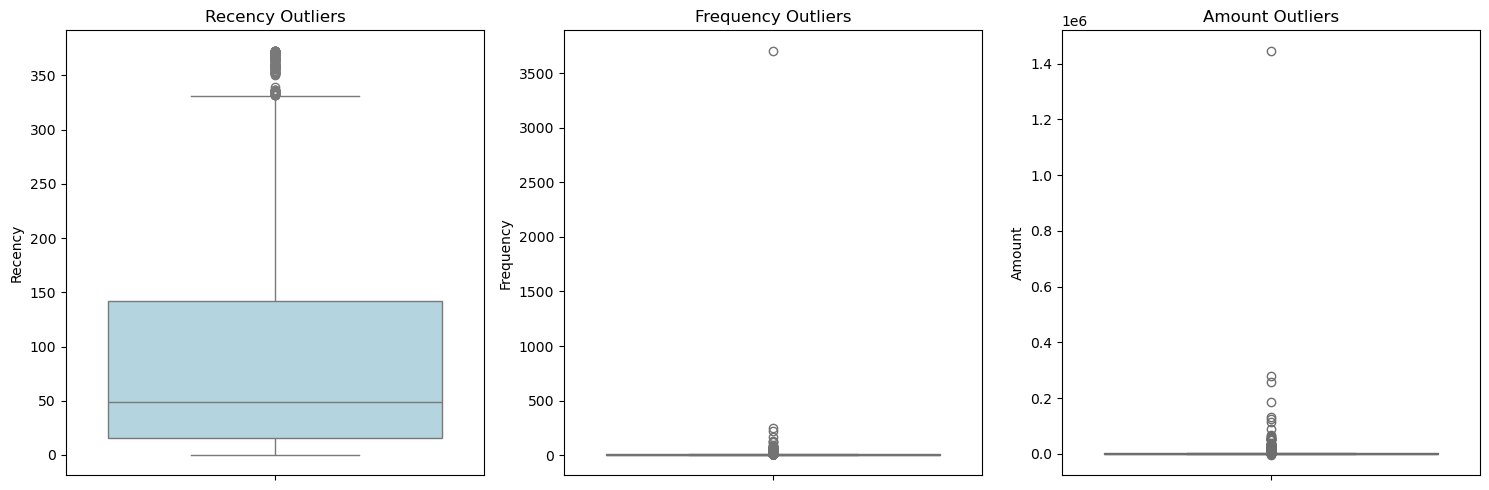

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your merged DataFrame is called `rfm` and has columns: Recency, Frequency, Monetary

plt.figure(figsize=(15, 5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm['Recency'], color='lightblue')
plt.title('Recency Outliers')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm['Frequency'], color='lightgreen')
plt.title('Frequency Outliers')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm['Amount'], color='lightcoral')
plt.title('Amount Outliers')

plt.tight_layout()
plt.show()


<Axes: >

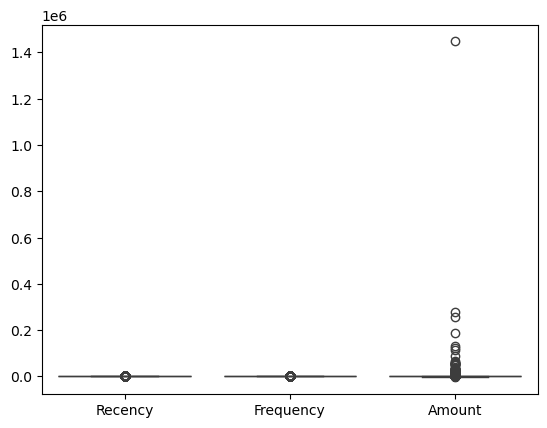

In [27]:
sns.boxplot(data=rfm[['Recency', 'Frequency', 'Amount']])

In [20]:
rfm.std(numeric_only=True)

Amount       23353.913810
Recency        100.763317
Frequency       56.798813
dtype: float64

In [38]:
a=(rfm['Recency'].std()/ rfm['Recency'].mean()) * 100
a

1050.0369326791206